In [1]:
%matplotlib inline
import pandas as pd
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge,BayesianRidge
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import time
import numpy as np
import matplotlib.pyplot
plt.rcParams['figure.figsize'] = [16, 10]

In [2]:
train = pd.read_csv('C:/Users/WuJue/Desktop/nyc-taxi-trip/output/train_visualed.csv')
test = pd.read_csv('C:/Users/WuJue/Desktop/nyc-taxi-trip/output/test_visualed.csv')

In [3]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

In [ ]:
#进行Kmeans聚类
#创建位置堆
starttime = time.time()
coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values))
#配置KMeans聚类参数
####
kmeans = KMeans(n_clusters=100).fit(coords)
#创建实际的聚类
train.loc[:, 'pickup_cluster'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
#显示上车位置的聚类
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.pickup_longitude.values[:500000], train.pickup_latitude.values[:500000], s=10, lw=0,
           c=train.pickup_cluster[:500000].values, cmap='autumn', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('Longitude',fontsize=25)
ax.set_ylabel('Latitude',fontsize=25)
#对聚类效果进行评估
labels = kmeans.labels_
score = metrics.calinski_harabaz_score(coords,labels)
plt.title('KMeans(cluster=100)',fontsize=25)
plt.text(0.99,.01, ('score: %.2f' % score),
        transform = plt.gca().transAxes, size=20,
        horizontalalignment = 'right')
endtime = time.time()
runningtime = endtime - starttime
plt.text(0.99,0.06, ('runningtime: %.2f' % runningtime),
        transform = plt.gca().transAxes, size=20,
        horizontalalignment = 'right')
plt.savefig('C:/Users/WuJue/Desktop/result/kmeans_cluster100.png')
plt.show()

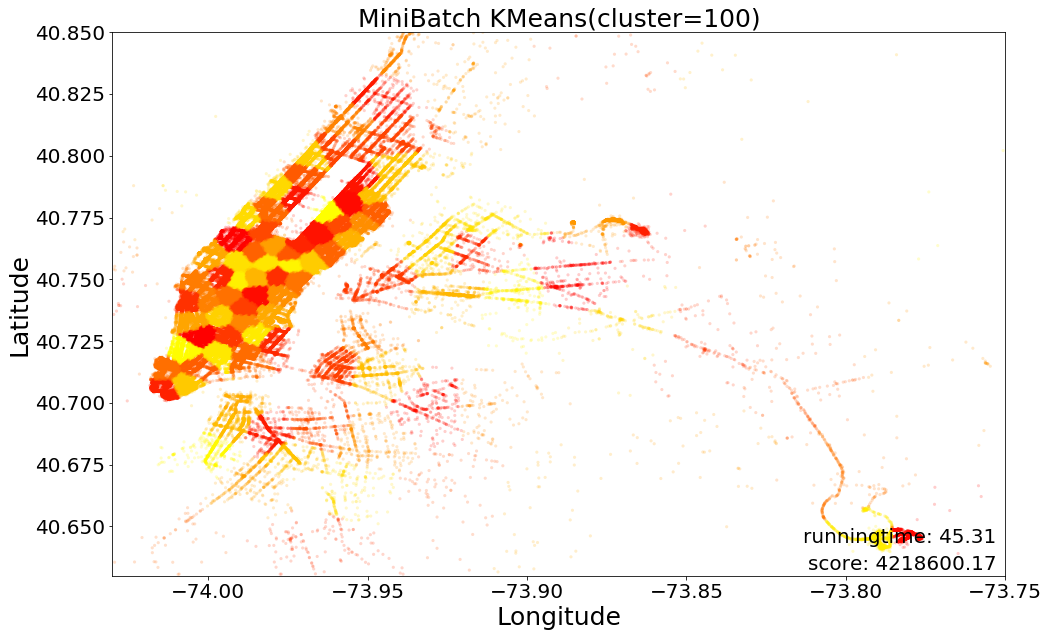

In [4]:
#进行Minibatch Kmeans聚类
#创建位置堆
starttime = time.time()
#long running
#do something other

coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values))
#配置KMeans聚类参数
sample_ind = np.random.permutation(len(coords))[:500000]
####
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=100000).fit(coords)

#创建实际的聚类
train.loc[:, 'pickup_cluster'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
train.loc[:, 'dropoff_cluster'] = kmeans.predict(train[['dropoff_latitude', 'dropoff_longitude']])
test.loc[:, 'pickup_cluster'] = kmeans.predict(test[['pickup_latitude', 'pickup_longitude']])
test.loc[:, 'dropoff_cluster'] = kmeans.predict(test[['dropoff_latitude', 'dropoff_longitude']])

#显示上车位置的聚类
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.pickup_longitude.values[:500000], train.pickup_latitude.values[:500000], s=10, lw=0,
           c=train.pickup_cluster[:500000].values, cmap='autumn', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude',fontsize=25)
ax.set_ylabel('Latitude',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#对聚类效果进行评估
labels = kmeans.labels_
score = metrics.calinski_harabaz_score(coords,labels)
####
plt.title('MiniBatch KMeans(cluster=100)',fontsize=25)
plt.text(0.99,.01, ('score: %.2f' % score),
        transform = plt.gca().transAxes, size=20,
        horizontalalignment = 'right')
endtime = time.time()
runningtime = endtime - starttime
plt.text(0.99,0.06, ('runningtime: %.2f' % runningtime),
        transform = plt.gca().transAxes, size=20,
        horizontalalignment = 'right')
#####
#plt.savefig('C:/Users/WuJue/Desktop/result/MiniBatch K-means.png')
plt.show()

In [ ]:
train.info()

In [ ]:
train.to_csv('C:/Users/WuJue/Desktop/nyc-taxi-trip/output/train_clustered.csv')
test.to_csv('C:/Users/WuJue/Desktop/nyc-taxi-trip/output/test_clustered.csv')

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
#进行MeanShift聚类
#创建位置堆
starttime = time.time()
coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values))
#配置MeanShift聚类参数
bandwidth = estimate_bandwidth(coords, quantile=0.2,n_samples=500)
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift.fit(coords)

#创建实际的聚类
train.loc[:, 'pickup_cluster'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
#显示上车位置的聚类
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.pickup_longitude.values[:500000], train.pickup_latitude.values[:500000], s=10, lw=0,
           c=train.pickup_cluster[:500000].values, cmap='autumn', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#对聚类效果进行评估
labels = meanshift.labels_
cluster_centers=meanshift.cluster_centers_
labels_unique=np.unique(labels)
n_clusters_ = len(labels_unique)
score = metrics.calinski_harabaz_score(coords,labels)
plt.text(0.99,.01, ('score: %.2f' % score),
        transform = plt.gca().transAxes, size=20,
         horizontalalignment = 'right')
#显示聚类数目
plt.title('MeanShift(clusters=%d)' % n_clusters_,fontsize=25)
endtime = time.time()
runningtime = endtime - starttime
plt.text(0.99,0.06, ('runningtime: %.2f' % runningtime),
        transform = plt.gca().transAxes, size=20,
        horizontalalignment = 'right')
plt.savefig('C:/Users/WuJue/Desktop/result/MeanShift.png')
plt.show()